In [21]:
import pandas as pd 
import numpy as np
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [22]:
data_order = pd.read_excel('/home/oh856/Downloads/Performance/orders.xlsx')
prod_perf= pd.read_excel('/home/oh856/Downloads/Performance/perf.xlsx')

In [23]:
order = data_order[['KPI_DATE','OMTNUM','TRADESNUM']]

In [24]:
start_date = '2020-11-30'
end_date = '2021-06-30'

In [25]:
order.drop(order[order.KPI_DATE > end_date].index, inplace=True)
order.drop(order[order.KPI_DATE < start_date].index, inplace=True)
order.drop(order[order.KPI_DATE == '2020-11-30'].index, inplace=True)



/home/oh856/XBID-ANALYTICS-DASH/myenv/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
prod_perf.drop(prod_perf[prod_perf.day > end_date].index, inplace=True)
prod_perf.drop(prod_perf[prod_perf.day < start_date].index, inplace=True)

In [27]:
prod_perf['OMT_NUM'] = order['OMTNUM'].values
prod_perf['TRADESNUM'] = order['TRADESNUM'].values

In [30]:
prod_perf = prod_perf[['Local O 50p','Remote O 50p','Remote Rprt O 50p','OMT_NUM','TRADESNUM']]

In [31]:
prod_perf.corr()

,Local O 50p,Remote O 50p,Remote Rprt O 50p,OMT_NUM,TRADESNUM
Local O 50p,1.000000,0.840770,0.847357,0.363999,0.413147
Remote O 50p,0.840770,1.000000,0.983631,0.229698,0.358535
Remote Rprt O 50p,0.847357,0.983631,1.000000,0.296993,0.386707
OMT_NUM,0.363999,0.229698,0.296993,1.000000,0.540379
TRADESNUM,0.413147,0.358535,0.386707,0.540379,1.000000


In [32]:
prod_perf.describe().T

,count,mean,std,min,25%,50%,75%,max
Local O 50p,212.0,11.120283,5.058980,3.0,6.00,12.0,15.00,22.0
Remote O 50p,212.0,8.608491,3.010648,4.0,5.00,10.0,11.00,12.0
Remote Rprt O 50p,212.0,10.589623,3.904850,4.0,5.00,13.0,14.00,15.0
OMT_NUM,212.0,6056.042453,6645.799234,1021.0,2348.50,3274.0,5592.50,40779.0
TRADESNUM,212.0,1883.075472,884.189571,233.0,1240.75,1684.0,2305.75,5905.0


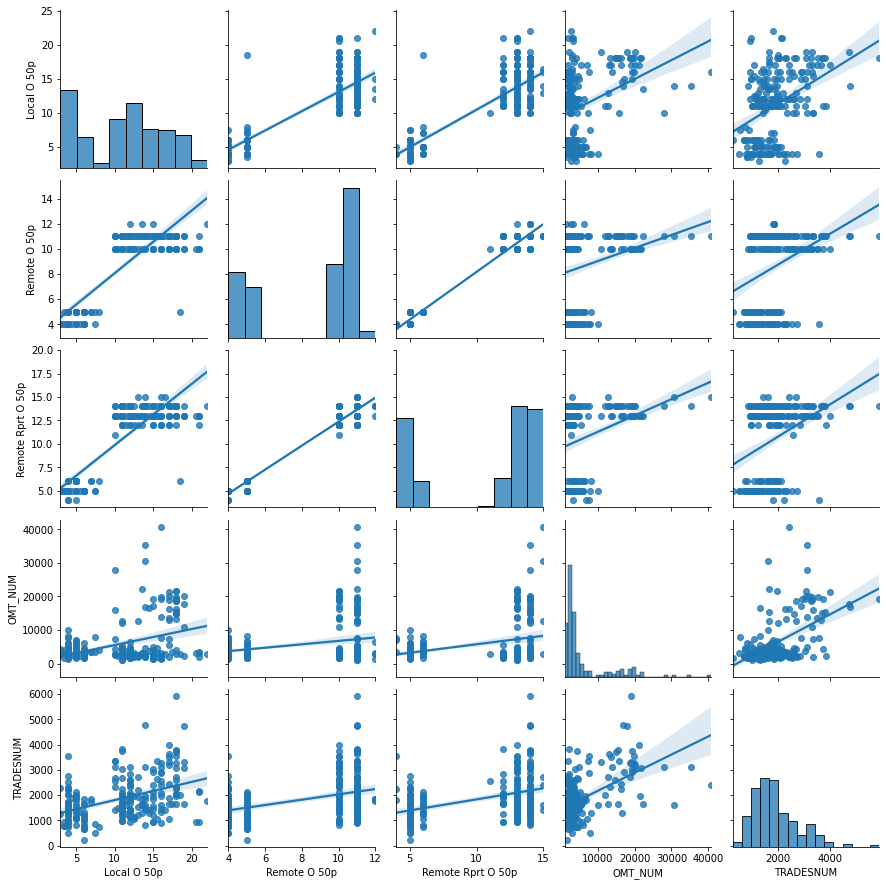

In [33]:
import seaborn as sns 
sns.pairplot(prod_perf, kind='reg');

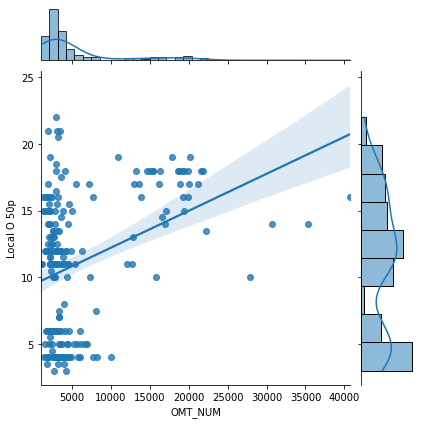

In [37]:
sns.jointplot(x='OMT_NUM', y='Local O 50p', data=prod_perf, kind='reg');

In [41]:
import statsmodels.api as sm 

In [85]:
X = prod_perf[['TRADESNUM']]
X[0:5]

,TRADESNUM
0,750
1,1163
2,1026
3,1171
4,665


In [86]:
X = sm.add_constant(X)

In [87]:
X[0:5]

,const,TRADESNUM
0,1.0,750
1,1.0,1163
2,1.0,1026
3,1.0,1171
4,1.0,665


In [88]:
y = prod_perf[['Local O 50p']]
y[0:5]

,Local O 50p
0,6.0
1,6.0
2,6.0
3,6.0
4,6.0


In [89]:
lm = sm.OLS(y,X)

In [90]:
model = lm.fit()

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Local O 50p   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     43.22
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           3.80e-10
Time:                        18:08:18   Log-Likelihood:                -624.16
No. Observations:                 212   AIC:                             1252.
Df Residuals:                     210   BIC:                             1259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6690      0.748      8.920      0.000       5.195       8.143
TRADESNUM      0.0024      0.000      6.574      0.000       0.002       0.003
==============================================================================
Omnibus:                        6.967   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                3.649
Skew:                           0.020   Prob(JB):                        0.161
Kurtosis:                       2.359   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
model.params #coefficients

const        6.668955
TRADESNUM    0.002364
dtype: float64

In [93]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.6690,0.748,8.920,0.000,5.195,8.143
TRADESNUM,0.0024,0.000,6.574,0.000,0.002,0.003


In [94]:
model.conf_int() #confidence intervals

,0,1
const,5.195044,8.142866
TRADESNUM,0.001655,0.003073


In [96]:
model.f_pvalue   #is model meaningful or not 

3.8021724931470703e-10

In [99]:
print('f_pvalue: ', '%.4f' % model.fvalue)

f_pvalue:  43.2226


In [100]:
print('f_pvalue: ', '%.4f' % model.tvalues[0:1])

f_pvalue:  8.9196


In [101]:
model.mse_model

921.7580565735743

In [106]:
model.fittedvalues[0:5]

0    8.441851
1    9.418125
2    9.094276
3    9.437036
4    8.240922
dtype: float64

In [103]:
y[0:20]

,Local O 50p
0,6.0
1,6.0
2,6.0
3,6.0
4,6.0


In [128]:
print(' Perf = ' + str('%.6f' % model.params[0]) + ' + TRADESNUM' + '*' + str('%.6f' % model.params[1]))

 Perf = 6.668955 + TRADESNUM*0.002364


/home/oh856/XBID-ANALYTICS-DASH/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


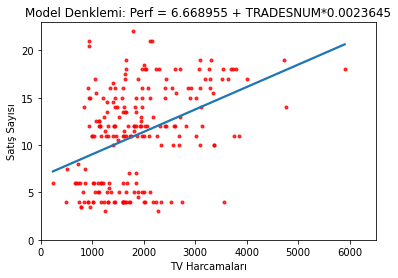

In [134]:
g = sns.regplot(prod_perf["TRADESNUM"], prod_perf["Local O 50p"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Perf = 6.668955 + TRADESNUM*0.0023645")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(0,6510)
plt.ylim(bottom=0);

# SCIKIT LEARN MODEL

In [138]:
from sklearn.linear_model import LinearRegression

In [137]:
X = prod_perf[['TRADESNUM']]
y = prod_perf[['Local O 50p']]


In [139]:
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([[0.00236386]])

In [140]:
model.score(X,y)

0.17069015876130822

In [142]:
model.predict([[20000]])

array([[53.94616643]])

In [143]:
yeni_veri = [[10000],[15000],[18000],[21000]]

In [144]:
model.predict(yeni_veri)

array([[30.3075608 ],
       [42.12686362],
       [49.2184453 ],
       [56.31002699]])